<div>
    <h1 style="color:red; text-align:center"> <b>Q1</b> </h1>
    <h2 style="color:white; text-align:right"> <b> رابطه ی توزیع دوجمله ای با برنولی</b> </h2>
    <br>
</div>

In [61]:
import numpy as np
import matplotlib.pyplot as plt

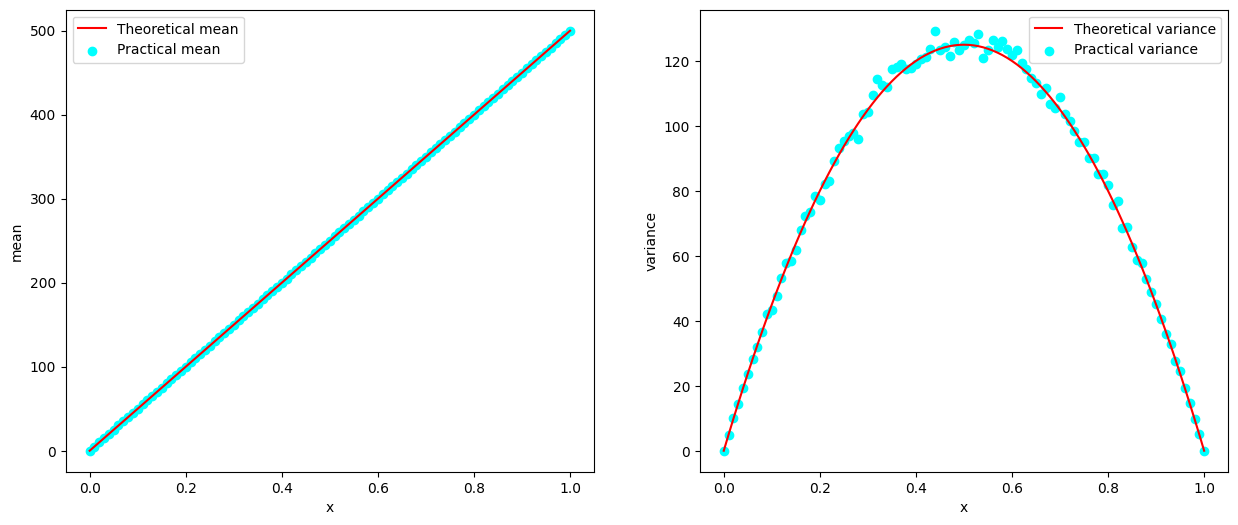

In [62]:
def bionomial_distribution(m, n, p):
    smaples = np.random.choice([0, 1], size=(m, n), p=[1-p, p])
    binomial_matrix = np.reshape(smaples, (m, n))
    sum_per_row = np.sum(binomial_matrix, axis=1)
    return sum_per_row


n = 500
p_values = np.linspace(0, 1, 101)

theoretical_means = n * p_values
theoretical_variances = n * p_values * (1 - p_values)

sampled_means = []
sampled_variances = []

m = 5000  

for p in p_values:
    samples = bionomial_distribution(m, n, p)
    mean = np.mean(samples)
    variance = np.var(samples)
    sampled_means.append(mean)
    sampled_variances.append(variance)

plt.figure(figsize=(15, 6))
plt.subplot(1, 2, 1)
plt.plot(p_values, theoretical_means, label='Theoretical mean', color='red')
plt.scatter(p_values, sampled_means, label='Practical mean', color='cyan')
plt.xlabel('x')
plt.ylabel('mean')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(p_values, theoretical_variances, label='Theoretical variance', color='red')
plt.scatter(p_values, sampled_variances, label='Practical variance', color='cyan')
plt.xlabel('x')
plt.ylabel('variance')
plt.legend()

plt.show()

<div>
    <h1 style="color:red; text-align:center"> <b>Q2</b> </h1>
    <h2 style="color:white; text-align:right"> <b> تخمین توزیع دوجمله ای به کمک توزیع های نرمال و پواسون</b> </h2>
    <br>
</div>

In [63]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

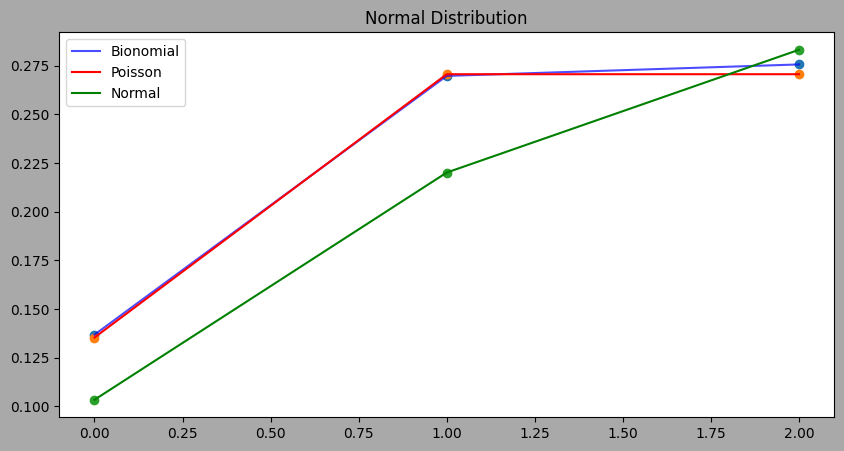

In [64]:
n = 250
p = 0.008
lamda = n * p
mean = n * p
sigma_2 = n * p * (1 - p)

num_of_samples = 10000
binomial_samples = np.random.binomial(n, p, size=num_of_samples)


end_of_range = 3
x_values = np.array([0] * end_of_range)

for x in binomial_samples:
    if x < end_of_range:
        x_values[x] += 1

x_values = np.divide(x_values, num_of_samples)

plt.figure(figsize=(10, 5), facecolor='darkgray')
ax = plt.axes()
ax.set_facecolor("white")
plt.plot(x_values, label='Bionomial', color='blue', alpha=0.7) 
plt.scatter(np.arange(end_of_range), x_values) 
plt.title('Binomial Distribution')
plt.legend()


dist_poisson = [poisson.pmf(r, lamda) for r in range(end_of_range)]
plt.plot(dist_poisson, label='Poisson', color='red')
plt.scatter(np.arange(end_of_range), dist_poisson)
plt.title('Poisson Distribution')
plt.legend()


dist_normal = [norm.pdf(r, mean, np.sqrt(sigma_2)) for r in range(end_of_range)]
plt.plot(dist_normal, label='Normal', color='green')
plt.scatter(np.arange(end_of_range), dist_normal)
plt.title('Normal Distribution')
plt.legend()

plt.show()

<div>
    <h1 style="color:red; text-align:center"> <b>Q3</b> </h1>
    <h2 style="color:white; text-align:right"> <b>اهمیت توزیع نرمال بخش اول</b> </h2>
    <br>
</div>

In [65]:
from scipy.stats import norm

In [66]:
mu = 80
sigma = 12

top_10_percent_score = norm.ppf(0.9, mu, sigma)

q2_score = norm.ppf(0.25, mu, sigma)
q3_score = norm.ppf(0.75, mu, sigma)


probability_between_80_and_90 = norm.cdf(90, mu, sigma) - norm.cdf(80, mu, sigma)


print("1. Minimum score for the top 10%: {:.2f}".format(top_10_percent_score))
print("2. Range between second and third quartile is: ({:.2f}, {:.2f})".format(q2_score, q3_score))
print("3. Probability between 80 and 90: {:.4f}".format(probability_between_80_and_90))

1. Minimum score for the top 10%: 95.38
2. Range between second and third quartile is: (71.91, 88.09)
3. Probability between 80 and 90: 0.2977


<div>
    <h1 style="color:red; text-align:center"> <b>Q3</b> </h1>
    <h2 style="color:white; text-align:right"> <b>اهمیت توزیع نرمال بخش اول امتیازی</b> </h2>
    <br>
</div>

In [67]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

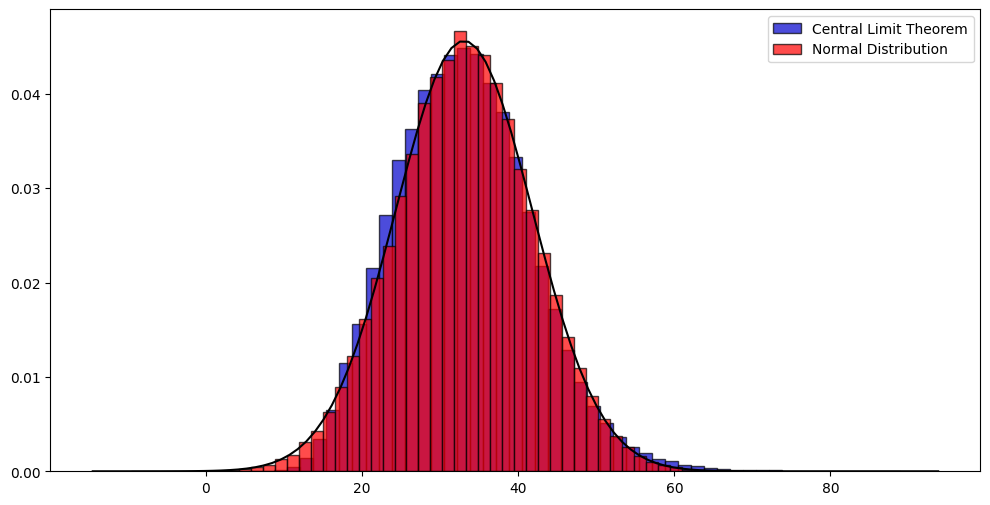

In [71]:
num_samples = 100000

physics_scores = np.random.uniform(low=0, high=20, size=num_samples)
ap_scores = np.random.exponential(scale=5, size=num_samples)
discrete_mathematics_scores = np.random.poisson(lam=18, size=num_samples)
total_scores = (physics_scores + ap_scores + discrete_mathematics_scores)

plt.figure(figsize=(12, 6))
plt.hist(total_scores, bins=50, density=True, alpha=0.7, color='mediumblue', edgecolor='black', label='Central Limit Theorem')

normal_mean = np.mean(total_scores)
normal_std = np.std(total_scores)
normal = np.random.normal(normal_mean, normal_std, num_samples)
plt.hist(normal, bins=50, density=True, alpha=0.7, color='red', edgecolor='black', label='Normal Distribution')

minn, maxx = plt.xlim()
xx = np.linspace(minn, maxx, 100)
yy = norm.pdf(xx, normal_mean, normal_std)
plt.plot(xx, yy, color="black")

plt.legend()


plt.show()

<div>
    <h1 style="color:red; text-align:center"> <b>Q4</b> </h1>
    <h2 style="color:white; text-align:right"> <b>اهمیت توزیع نرمال بخش دوم</b> </h2>
    <br>
</div>

In [69]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import poisson, norm

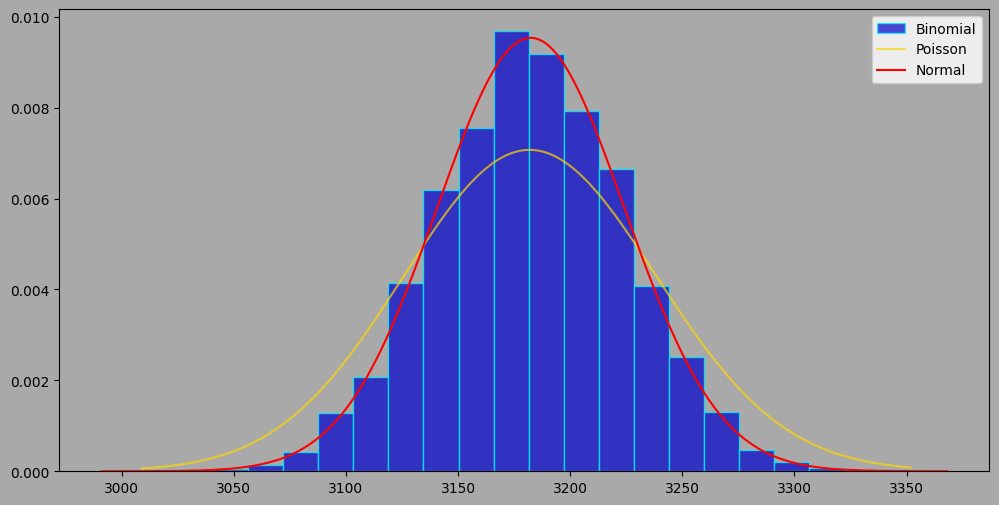

In [70]:
n = 7072
p = 0.45
landa = n * p
mean = n * p
sigma_2 = n * p * (1 - p)
num_of_samples = 10000

binomial_samples = np.random.binomial(n, p, size=num_of_samples)

plt.figure(figsize=(12, 6), facecolor='darkgray')
ax = plt.axes()
ax.set_facecolor("darkgray")
plt.hist(binomial_samples, bins=20, density=True, alpha=0.7, edgecolor='cyan' ,color='mediumblue', label='Binomial')
plt.legend()

mn, mx = plt.xlim()
poisson_range = np.arange(int(mn), int(mx), 1)
dist_poisson = [poisson.pmf(poisson_range[r], landa) for r in range(len(poisson_range))]
plt.plot(poisson_range, dist_poisson, alpha=0.7, color='gold', label='Poisson')
plt.legend()

mnn, mxx = plt.xlim()
normal_range = np.arange(int(mnn), int(mxx), 1)
dist_normal = [norm.pdf(normal_range[r], mean, np.sqrt(sigma_2)) for r in range(len(normal_range))]
plt.plot(normal_range, dist_normal, color='red', label='Normal')
plt.legend()

plt.show()
